In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math
%matplotlib inline

In [41]:
datapurchase=pd.read_csv('SocialNetworkAds.csv')

In [42]:
datapurchase.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


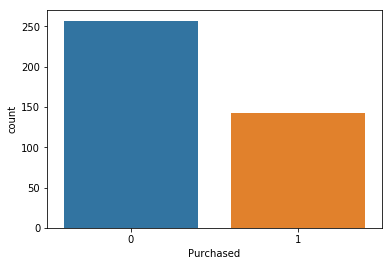

In [43]:
#Data Analysis
sns.countplot(x='Purchased',data=datapurchase)

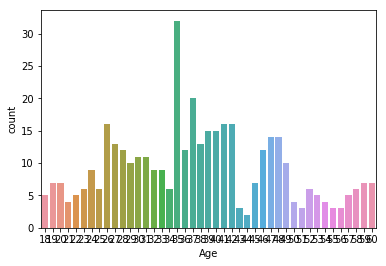

In [72]:
sns.countplot(x='Age',data=datapurchase)

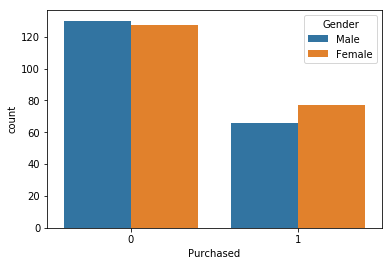

In [44]:
sns.countplot(x='Purchased',hue='Gender',data=datapurchase)

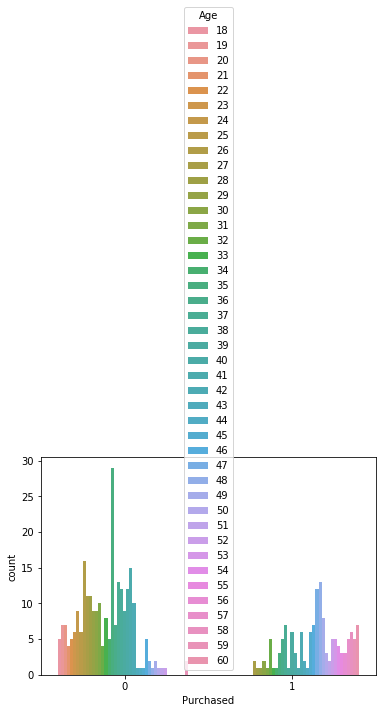

In [45]:
sns.countplot(x='Purchased',hue='Age',data=datapurchase)

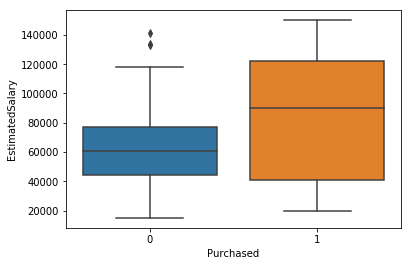

In [46]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=datapurchase)

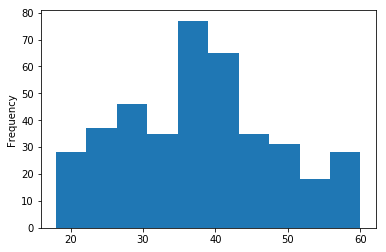

In [47]:
datapurchase['Age'].plot.hist()

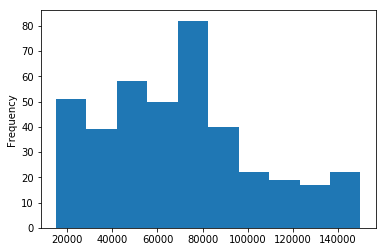

In [48]:
datapurchase['EstimatedSalary'].plot.hist()

In [49]:
#data cleaning
datapurchase.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

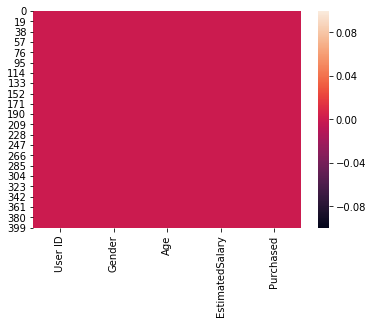

In [50]:
sns.heatmap(datapurchase.isnull())

In [51]:
datapurchase.drop('User ID',axis=1,inplace=True)

In [52]:
datapurchase.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [53]:
sex=pd.get_dummies(datapurchase['Gender'],drop_first=True)

In [54]:
datapurchase=pd.concat([datapurchase,sex],axis=1)

In [55]:
datapurchase.drop('Gender',axis=1,inplace=True)

In [56]:
datapurchase.head(3)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0


In [57]:
#model Building
X=datapurchase.drop('Purchased',axis=1)
y=datapurchase['Purchased']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [59]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
prediction=regressor.predict(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.85      0.83        81\n           1       0.65      0.56      0.60        39\n\n   micro avg       0.76      0.76      0.76       120\n   macro avg       0.72      0.71      0.71       120\nweighted avg       0.75      0.76      0.75       120\n'

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,prediction)

array([[69, 12],
       [17, 22]], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,prediction)

0.7583333333333333

In [67]:
#For certain person prediction:
def decode(num):
    for i in num:
        if i==0:
            print('Not Purchased')
        else:
            print('Purchased')


In [68]:
d1=int(input('Enter age : '))
d2=int(input('Enter Salary : '))
d3=int(input('Enter Male/Female : '))
d=[[d1,d2,d3]]

Enter age : 10
Enter Salary : 20000
Enter Male/Female : 1


In [71]:
decode(regressor.predict(d))

Not Purchased
